<h1>Task 1: Prediction using Supervised Machine Learning</h1><br>
<b>Predict the marks of a student based on the number of study hours</b>
<p>Author: Harshini S <br>
Organisation: The Sparks Foundation</p>

<h4>Importing the required libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from ipywidgets import interact, widgets,Layout
%matplotlib inline

<h4>Reading the data</h4>

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("The data is read")

The data is read


<h4>Checking the data</h4>

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h4>Checking for null values</h4> <p>No null values present in the data</p>

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h4>Visualizing the data</h4>

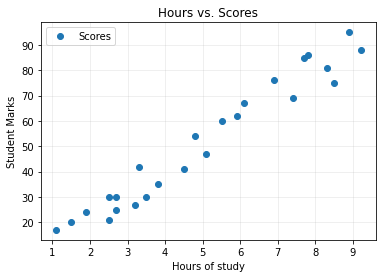

In [5]:
data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs. Scores")
plt.xlabel("Hours of study")
plt.ylabel("Student Marks")
plt.grid(alpha=0.25)
plt.show()

<h4>Splitting the Dependent and Independent variables</h4>

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

<h4>Train Test Split</h4>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<h4>Training the Linear Regression Model</h4>

In [8]:
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)
print("The model is trained")

The model is trained


<h4>Finding the intercept and coefficient</h4>
<p> Line Equation -> y = mx + c</p>
<p>m - Slope (Coefficient)</p>
<p>c - Intercept </p>

In [9]:
print("The intercept (c): ", linearmodel.intercept_)
print("The slope (m): ", linearmodel.coef_)

The intercept (c):  1.932204253151646
The slope (m):  [9.94167834]


<h4>Plotting the regression line</h4>

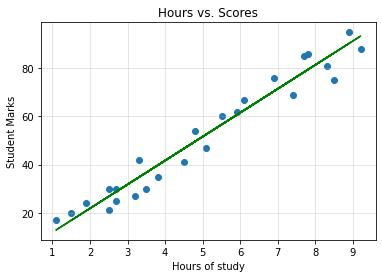

In [10]:
line_y = linearmodel.coef_ * X + linearmodel.intercept_
plt.scatter(X,y)
plt.plot(X, line_y, color = "green")
plt.grid(alpha = 0.4)
plt.title("Hours vs. Scores")
plt.xlabel("Hours of study")
plt.ylabel("Student Marks")
plt.show()
#The green line is the line of best fit

<h4>Prediction of Scores for the test data</h4>

In [11]:
y_pred = linearmodel.predict(X_test)
print("The prediction is complete")

The prediction is complete


<h4>Comparing the Actual Data and Predicted Data</h4>

In [12]:
output_data = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': y_pred})
output_data

,Actual Data,Predicted Data
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


<h4>Model evaluation metrics</h4>

In [13]:
print("The mean absolute error: ",metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error: ",metrics.mean_squared_error(y_test, y_pred))

The mean absolute error:  4.130879918502486
The mean squared error:  20.33292367497997


<h4>Predicting the score for a single value</h4>

In [14]:
value = 3.5
value = np.array(value).reshape(-1,1)
linearmodel.predict(value)

array([36.72807844])

<h4>Predicting the score for any value</h4>

In [15]:
def PredictScore(x):
    hours = np.array(x).reshape(-1, 1)
    pred_value = linearmodel.predict(hours)
    print("No of Study Hours = {}".format(hours))
    print("Predicted Score of the student = {}".format(pred_value[0]))

In [16]:
print("Slide across the bar to see the output")
interact(PredictScore,x=widgets.FloatSlider(min=3,
                                            max=10,
                                            value=5,
                                            step=0.01,
                                            description='Study Hours', 
                                            layout=Layout(width='950px')))

Slide across the bar to see the output


interactive(children=(FloatSlider(value=5.0, description='Study Hours', layout=Layout(width='950px'), max=10.0…

<function __main__.PredictScore(x)>

<h4>Insights from the data</h4>

<ul>
    <li>From the data, we can conclude than the student marks is in direct linear propotion with the study hours.</li>
    <li>As the study hours increase, the mark of the student also increases</li>
</ul>

<div style="text-align: right"> - Harshini S</div>